In [1]:
# Import Dependencies
from sqlalchemy import create_engine

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import Username, Password and Database_name
from config import username, password, db_name
print("All the necessary libraries imported")


All the necessary libraries imported


In [2]:

# connect to postgres engine.

engine = create_engine('postgres://'+ username + ':' + password + '@localhost:5432/'+ db_name ) 
connection = engine.connect()

In [4]:
# Test
Salary_df = pd.read_sql('Select * From salaries', connection)
Salary_df.head()

,emp_no,salary,from_date,to_date
0,10001,60117,1986-06-26,1987-06-26
1,10002,65828,1996-08-03,1997-08-03
2,10003,40006,1995-12-03,1996-12-02
3,10004,40054,1986-12-01,1987-12-01
4,10005,78228,1989-09-12,1990-09-12


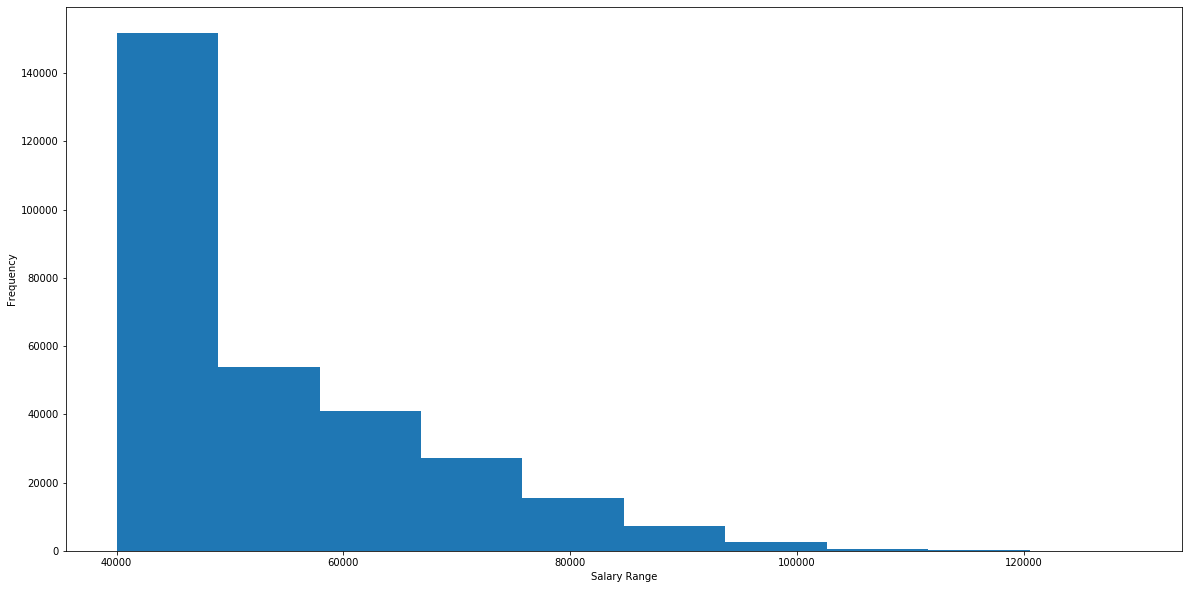

In [5]:
plt.figure(figsize = (20, 10))
plt.hist(Salary_df['salary'])
plt.ylabel('Frequency')
plt.xlabel('Salary Range')
plt.show()

In [11]:
SalaryByTitles_df =  pd.read_sql('Select titles.title, salaries.salary From salaries Join titles ON titles.emp_no = salaries.emp_no', connection)

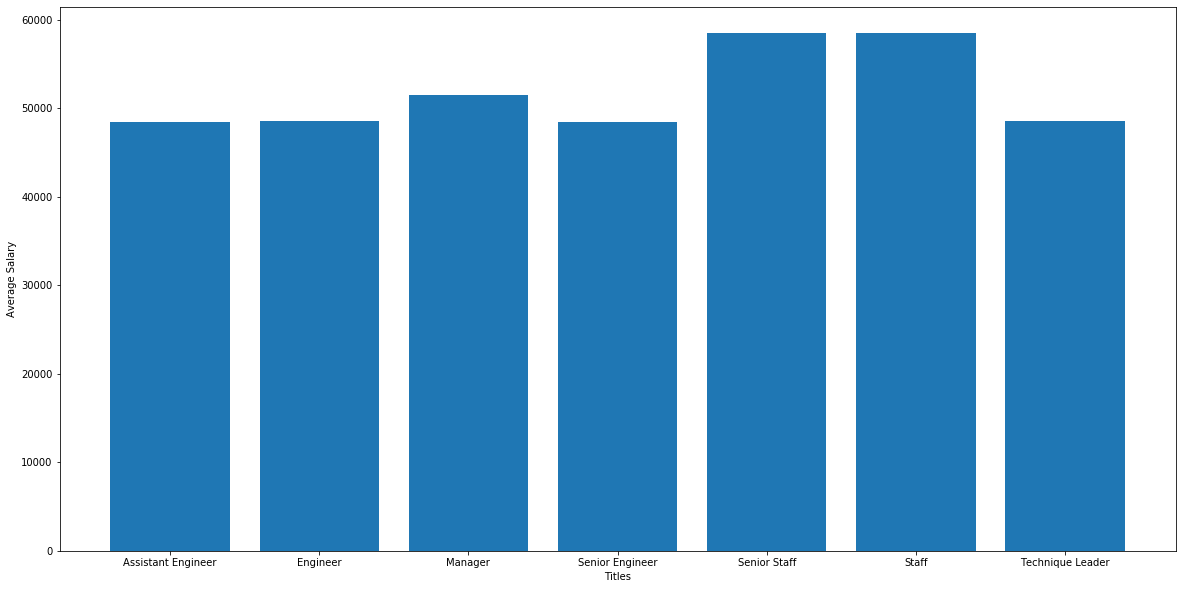

In [13]:
plt.figure(figsize = (20, 10))
plt.bar(SalaryByTitles_df.groupby('title').mean().index.to_list(),SalaryByTitles_df.groupby('title').mean()['salary'].to_list())
plt.ylabel('Average Salary')
plt.xlabel('Titles')
plt.show()

In [14]:
My_pay = pd.read_sql('Select * From Salaries Where emp_no=499942', connection)
My_pay['salary'][0]


40000

In [15]:
connection.close()